<a href="https://colab.research.google.com/github/ajith18thayil/My-WorkS/blob/main/handling_imbalanced_data_framingham_heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
df['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

In [ ]:
df.drop(['education'],axis=1,inplace=True)
df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
df.isna().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
df['heartRate'].value_counts()

75.0     563
80.0     385
70.0     305
60.0     231
85.0     228
        ... 
47.0       1
130.0      1
140.0      1
51.0       1
46.0       1
Name: heartRate, Length: 73, dtype: int64

In [ ]:
df['cigsPerDay']=df['cigsPerDay'].fillna(df['cigsPerDay'].mode()[0])
df['BPMeds']=df['BPMeds'].fillna(df['BPMeds'].mode()[0])
df['totChol']=df['totChol'].fillna(df['totChol'].mean())
df['BMI']=df['BMI'].fillna(df['BMI'].mean())
df['heartRate']=df['heartRate'].fillna(df['heartRate'].mode()[0])
df['glucose']=df['glucose'].fillna(df['glucose'].mean())

In [ ]:
df.isna().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

1. Oversampling

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
from imblearn.over_sampling import SMOTE    #Synthetic Minority Oversampling Technique
oversample=SMOTE()
xo,yo=oversample.fit_resample(x,y)

In [ ]:
yo.value_counts()

0    3596
1    3596
Name: TenYearCHD, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xo,yo,test_size=0.30,random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_new=sc.fit_transform(x_train)
x_test_new=sc.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_new,y_train)
y_pred_knn=knn.predict(x_test_new)
y_pred_knn

array([1, 1, 1, ..., 0, 0, 1])

              precision    recall  f1-score   support

           0       0.82      0.66      0.73      1074
           1       0.72      0.86      0.78      1084

    accuracy                           0.76      2158
   macro avg       0.77      0.76      0.76      2158
weighted avg       0.77      0.76      0.76      2158

[[711 363]
 [156 928]]
Accuracy Score is: 0.7594995366079703


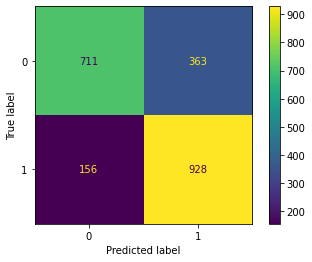

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score
print(classification_report(y_test,y_pred_knn))
result=confusion_matrix(y_test,y_pred_knn)
print(result)
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()
print('Accuracy Score is:',accuracy_score(y_test,y_pred_knn))

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train_new,y_train)
y_pred_nb=nb.predict(x_test_new)
y_pred_nb

array([1, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.58      0.84      0.69      1074
           1       0.72      0.40      0.52      1084

    accuracy                           0.62      2158
   macro avg       0.65      0.62      0.60      2158
weighted avg       0.65      0.62      0.60      2158

[[907 167]
 [650 434]]
Accuracy Score is: 0.6214087117701576


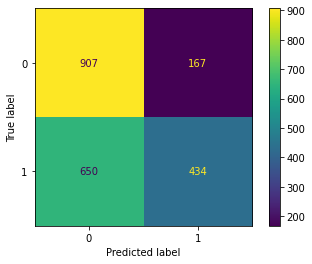

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score
print(classification_report(y_test,y_pred_nb))
result=confusion_matrix(y_test,y_pred_nb)
print(result)
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()
print('Accuracy Score is:',accuracy_score(y_test,y_pred_nb))

In [ ]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train_new,y_train)
y_pred_svm=sv.predict(x_test_new)
y_pred_svm


array([1, 0, 1, ..., 0, 0, 1])

              precision    recall  f1-score   support

           0       0.76      0.69      0.73      1074
           1       0.72      0.79      0.75      1084

    accuracy                           0.74      2158
   macro avg       0.74      0.74      0.74      2158
weighted avg       0.74      0.74      0.74      2158

[[745 329]
 [229 855]]
Accuracy Score is: 0.7414272474513438


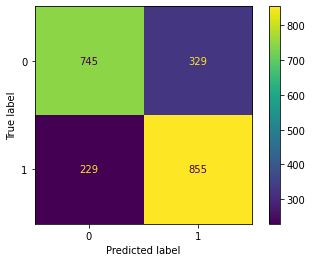

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score
print(classification_report(y_test,y_pred_svm))
result=confusion_matrix(y_test,y_pred_svm)
print(result)
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()
print('Accuracy Score is:',accuracy_score(y_test,y_pred_svm))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train_new,y_train)
y_pred_tree=clf.predict(x_test_new)
y_pred_tree

array([1, 1, 0, ..., 1, 0, 1])

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1074
           1       0.78      0.82      0.80      1084

    accuracy                           0.79      2158
   macro avg       0.79      0.79      0.79      2158
weighted avg       0.79      0.79      0.79      2158

[[826 248]
 [200 884]]
Accuracy Score is: 0.7924003707136237


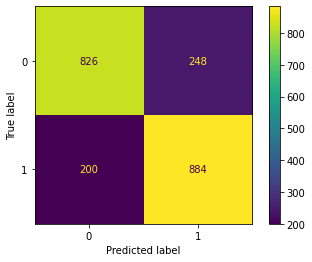

In [ ]:
#@title
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score
print(classification_report(y_test,y_pred_tree))
result=confusion_matrix(y_test,y_pred_tree)
print(result)
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()
print('Accuracy Score is:',accuracy_score(y_test,y_pred_tree))

2. undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
under=RandomUnderSampler()
xu,yu=under.fit_resample(x,y)

In [ ]:
yu.value_counts()

0    644
1    644
Name: TenYearCHD, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xu,yu,test_size=0.30,random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_new=sc.fit_transform(x_train)
x_test_new=sc.transform(x_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train_new,y_train)
y_pred_nb=nb.predict(x_test_new)
y_pred_nb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

              precision    recall  f1-score   support

           0       0.54      0.90      0.68       196
           1       0.68      0.23      0.34       191

    accuracy                           0.57       387
   macro avg       0.61      0.56      0.51       387
weighted avg       0.61      0.57      0.51       387

[[176  20]
 [148  43]]
Accuracy Score is: 0.5658914728682171


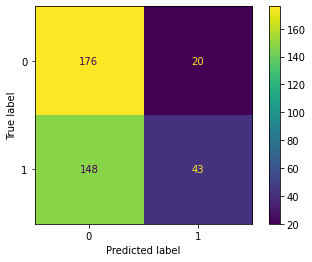

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score
print(classification_report(y_test,y_pred_nb))
result=confusion_matrix(y_test,y_pred_nb)
print(result)
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()
print('Accuracy Score is:',accuracy_score(y_test,y_pred_nb))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_new,y_train)
y_pred_knn=knn.predict(x_test_new)
y_pred_knn

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,

              precision    recall  f1-score   support

           0       0.63      0.66      0.64       196
           1       0.63      0.60      0.61       191

    accuracy                           0.63       387
   macro avg       0.63      0.63      0.63       387
weighted avg       0.63      0.63      0.63       387

[[129  67]
 [ 77 114]]
Accuracy Score is: 0.627906976744186


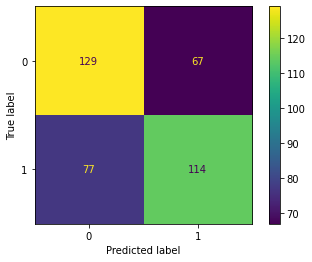

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score
print(classification_report(y_test,y_pred_knn))
result=confusion_matrix(y_test,y_pred_knn)
print(result)
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()
print('Accuracy Score is:',accuracy_score(y_test,y_pred_knn))